<a href="https://colab.research.google.com/github/pooja195manjunath/Machine-Learning-/blob/main/1bm22cs195_Lab5_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3 (3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN classifier: {accuracy * 100:.2f}%')

# Sample output: predicted values vs actual values
print("\nPredictions vs Actual values:")
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(df.head())


Accuracy of the KNN classifier: 100.00%

Predictions vs Actual values:
   Predicted  Actual
0          1       1
1          0       0
2          2       2
3          1       1
4          1       1


SVM

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier (using a linear kernel)
svm = SVC(kernel='linear')

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM classifier: {accuracy * 100:.2f}%')

# Sample output: predicted values vs actual values
print("\nPredictions vs Actual values:")
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(df.head())


Accuracy of the SVM classifier: 100.00%

Predictions vs Actual values:
   Predicted  Actual
0          1       1
1          0       0
2          2       2
3          1       1
4          1       1


knn with dataset

Accuracy of the KNN classifier: 100.00%

Predictions vs Actual values:
   Predicted  Actual
0          1       1
1          0       0
2          2       2
3          1       1
4          1       1


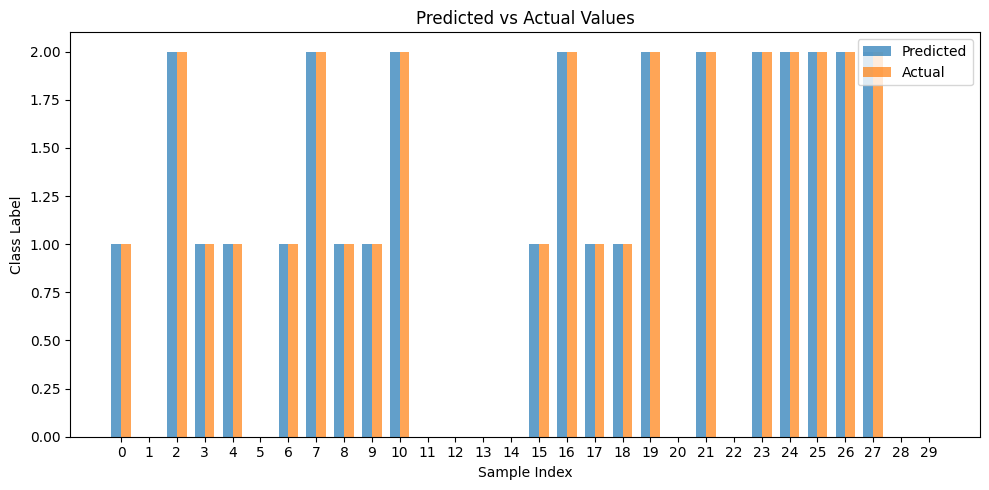

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Function to load dataset and train KNN model
def train_knn_model(input_file):
    # Load the dataset
    data = pd.read_csv(input_file)

    # Assuming the last column is the target variable
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values    # Target variable

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate through columns of X and encode any string columns
    for i in range(X.shape[1]):
        if isinstance(X[0, i], str): # Check if the column contains strings
            X[:, i] = label_encoder.fit_transform(X[:, i]) # Encode the column

    # Encode the target variable if it contains strings
    if isinstance(y[0], str):
        y = label_encoder.fit_transform(y)

    # Drop rows with NaN values in the target variable (y)
    # before splitting the data
    not_nan_index = ~np.isnan(y) #get the index where y is not nan
    X = X[not_nan_index] # filter X with the index
    y = y[not_nan_index] # filter y with the index


    # Split the data into training and testing sets (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the KNN classifier with k=3 (3 nearest neighbors)
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of the KNN classifier: {accuracy * 100:.2f}%')

    # Sample output: predicted values vs actual values
    print("\nPredictions vs Actual values:")
    df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
    print(df.head())

    # Plotting the predictions vs actual values
    plt.figure(figsize=(10, 5))
    index = np.arange(len(y_pred))
    bar_width = 0.35

    plt.bar(index, y_pred, bar_width, label='Predicted', alpha=0.7)
    plt.bar(index + bar_width, y_test, bar_width, label='Actual', alpha=0.7)

    plt.xlabel('Sample Index')
    plt.ylabel('Class Label')
    plt.title('Predicted vs Actual Values')
    plt.xticks(index + bar_width / 2, range(len(y_pred)))
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
input_file = "/content/sample_data/iris.csv"  # Replace with your dataset path
train_knn_model(input_file)

svm with dataset

SVM Irrigation Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       144
           1       0.82      0.87      0.85       256

    accuracy                           0.80       400
   macro avg       0.78      0.77      0.77       400
weighted avg       0.79      0.80      0.79       400



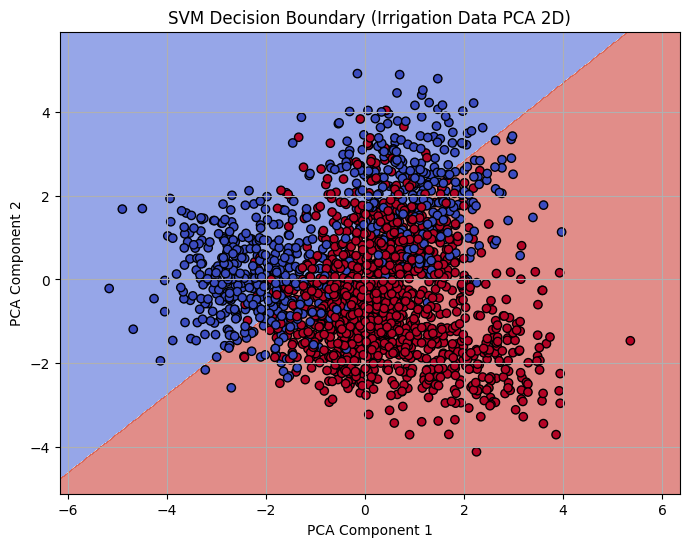

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from sklearn.decomposition import PCA # Import PCA
from sklearn.metrics import classification_report # Import classification_report
import matplotlib.pyplot as plt

# Load SVM irrigation dataset
svm_data = pd.read_csv("/content/irrigation_machine.csv")
X_svm = svm_data.filter(like='sensor')
y_svm = svm_data["parcel_0"]  # Assuming parcel_0 is the target

# Initialize StandardScaler and PCA
scaler = StandardScaler() # Initialize the scaler
pca = PCA(n_components=2) # Initialize PCA for 2D reduction


# Standardize and reduce to 2D
X_scaled_svm = scaler.fit_transform(X_svm)
X_pca_svm = pca.fit_transform(X_scaled_svm)

# Split and train SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_pca_svm, y_svm, test_size=0.2, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train_svm, y_train_svm)
y_pred_svm = svm.predict(X_test_svm)

# Evaluation
print("SVM Irrigation Report:\n", classification_report(y_test_svm, y_pred_svm))

# Visualization with decision boundary
def plot_svm_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title("SVM Decision Boundary (Irrigation Data PCA 2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

plot_svm_boundary(X_pca_svm, y_svm, svm)